# Análise Ibovespa x Renda Fixa em anos eleitorais

Metodologia

### Eleições 2002

Datas de votação

- 1º turno - 06/10/2002
- 2º turno - 27/10/2002

Dias com fatos relevantes (temas políticos)


Datafolha Pesquisas

- "Serra se isola no Segundo lugar" - 07/06/2002
- "Ciro chega a 18% e empata com Serra no segundo lugar" - 05/07/2002
- "Ciro chega a 28% e se aproxima de Lula; sem Garotinho, ocorre empate técnico entre os dois candidatos" - 30/07/2002
- "Lula se recupera e atinge 37%; Ciro oscila negativamente e tem 27%; Serra divide terceiro lugar com Garotinho" - 16/08/2002
- "Ciro, 20%, divide segundo lugar com Serra, 19%; Lula mantém liderança, com 37%" - 30/08/2002

![https://www.ibpad.com.br/wp-content/uploads/2018/10/pesquisa-2002-1024x637.png](https://www.ibpad.com.br/wp-content/uploads/2018/10/pesquisa-2002-1024x637.png)

Fonte das informações das pesquisas [datafolha](https://datafolha.folha.uol.com.br/eleicoes/2002/indice-1.shtml)

In [1]:
# Bibliotecas necessárias para serem instaladas!
!pip install yfinance
!pip install quandl

     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 6.4 MB 47.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import pandas as pd
from datetime import datetime, date, timedelta
from scipy import stats
from pandas_datareader import data as web
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import csv 
import pickle
import numpy as np 
import seaborn as sn
import yfinance as yf
import quandl
import matplotlib.pyplot as plt

# Quandln - Personal API Key
quandl.ApiConfig.api_key = "G_bGC31ENrK3u_fp6SP6"

In [3]:
def stock_data(stock_name, start_date, end_date=date.today(), country='US'):
    """
        This function return a dataframe with the price of the stock
        since the start_date until the end_date. If you want to get
        a single value, please use get stockValue
    """
    stock = stock_name
    if(country == 'BR'):
        stock = stock_name + '.SA'
    df = pd.DataFrame()
    # import data to data frame
    df = yf.download(stock, start=start_date, end=end_date)
    return df 

In [4]:
# Definir as datas da análise de 2002
start_2002 = '2002-01-01'
end_2002 = '2002-12-31'

In [5]:
# Pegar dados bovespa e CDI
ibov_2002 = stock_data('^BVSP', start_2002, end_2002)

[*********************100%***********************]  1 of 1 completed


#### Fatores Primeiro Turno

In [6]:
labels = [(pd.to_datetime('2002-06-07'), 'Serra', 'b'), # serra é segundo lugar
          (pd.to_datetime('2002-07-05'), 'Ciro\nSerra', 'r'), # ciro empata com serra 
          (pd.to_datetime('2002-07-30'), 'Ciro', 'r'), # ciro se aproxima de lula
          (pd.to_datetime('2002-08-16'), 'Ciro', 'r'), # lula se recupera, serra é 3
          (pd.to_datetime('2002-08-30'), 'Ciro\nSerra', 'r'), # ciro se recupera
          (pd.to_datetime('2002-09-09'), 'Lula\nDispara', 'r'), #
          (pd.to_datetime('2002-09-20'), 'Lula', 'r'), #
          (pd.to_datetime('2002-09-27'), 'Lula', 'r'), #
          (pd.to_datetime("2002-10-06"), '1º\nturno', 'g'),
          (pd.to_datetime("2002-10-27"), '2º\nturno', 'g')] 
          
# [INFOS] - https://datafolha.folha.uol.com.br/eleicoes/2002/indice-3.shtml

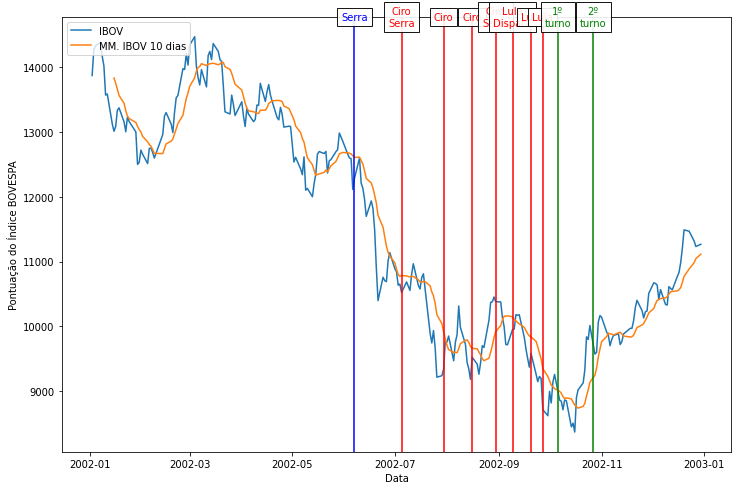

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))
# ibovespa
ax.plot(ibov_2002['Close'], label='IBOV')
mmv = ibov_2002['Close'].rolling(window =10).mean()
ax.plot(mmv, label='MM. IBOV 10 dias')
# cdi
# ax.plot(cdi_2002, label='CDI')
ax.set_xlabel('Data')
ax.set_ylabel('Pontuação do Índice BOVESPA')
ax.legend(loc='upper left')
#
for date_point, label, clr in labels:
    plt.axvline(x=date_point, color=clr)
    plt.text(date_point, ax.get_ylim()[1]-4, label,
             horizontalalignment='center',
             verticalalignment='center',
             color=clr,
             bbox=dict(facecolor='white', alpha=0.9))

#### Fatores Segundo Turno

#### Bolsa x CDI em 2002

In [9]:
def apply_anual(x):
  y = ((x+1)**365 - 1) * 100
  return y

In [10]:
# calcular retorno (%) a partir do índice
ibov_2002['return'] = ibov_2002['Close'].pct_change().fillna(0)
# calcular retorno anualizado
ibov_2002['anual'] = apply_anual(ibov_2002['return'])
ipca_2002 = cdi_2002 = quandl.get('BCB/13522', start_date = start_2002, end_date = end_2002)
cdi_2002 = quandl.get('BCB/4392', start_date = start_2002, end_date = end_2002)

In [11]:
#retorno anual
ibov_2002['Close']['2002-12-30']/ibov_2002['Close']['2002-01-02']

0.8122837370242214

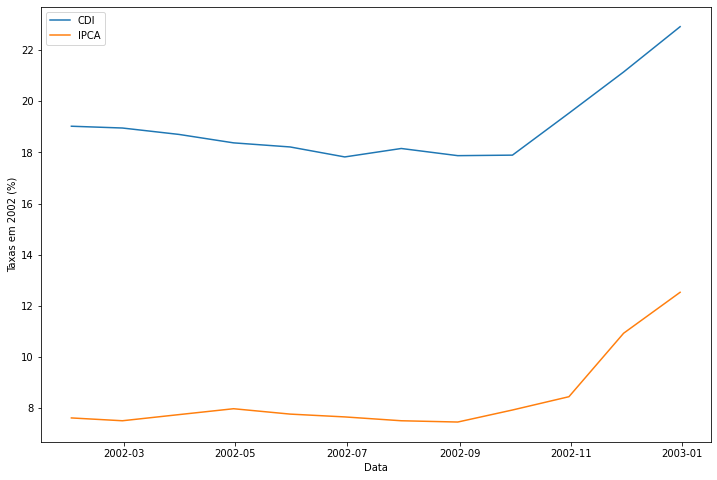

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))
# ibovespa
ax.plot(cdi_2002, label='CDI')
ax.plot(ipca_2002, label='IPCA')
# cdi
# ax.plot(cdi_2002, label='CDI')
ax.set_xlabel('Data')
ax.set_ylabel('Taxas em 2002 (%)')
ax.legend(loc='upper left')

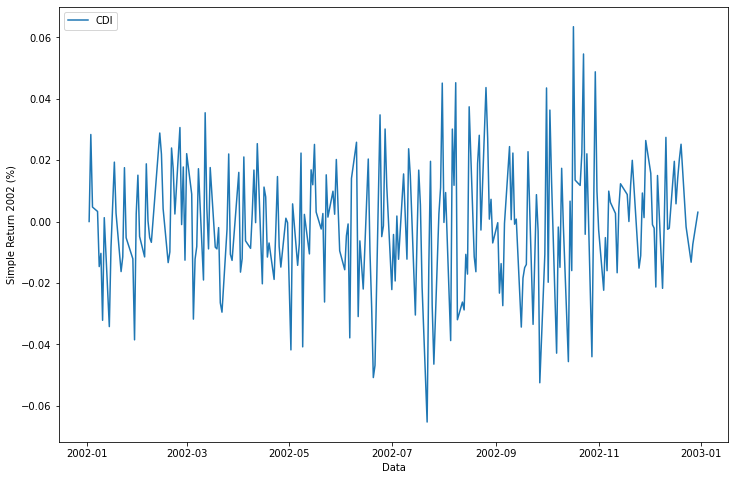

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
# ibovespa
ax.plot(ibov_2002['return'], label='CDI')
# cdi
# ax.plot(cdi_2002, label='CDI')
ax.set_xlabel('Data')
ax.set_ylabel('Simple Return 2002 (%)')
ax.legend(loc='upper left')

## Eleições 2006

Datas de votação

- 1º turno - 01/10/2006
- 2º turno - 29/10/2006

Dias com fatos relevantes (temas políticos)

![2006img](https://www.ibpad.com.br/wp-content/uploads/2018/10/pesquisa-2006-1024x637.png)

In [13]:
start06 = '2006-01-01'
end06 = '2006-12-31'

#### Fatores Primeiro Turno

In [17]:
labels = [(pd.to_datetime("2006-08-29"), 'Lula Lidera', 'g'),
          (pd.to_datetime("2006-10-01"), '1º\nturno', 'g'),
          (pd.to_datetime("2006-10-29"), '2º\nturno', 'r')]

In [15]:
ibov_2006 = stock_data('^BVSP', start06, end06)

[*********************100%***********************]  1 of 1 completed


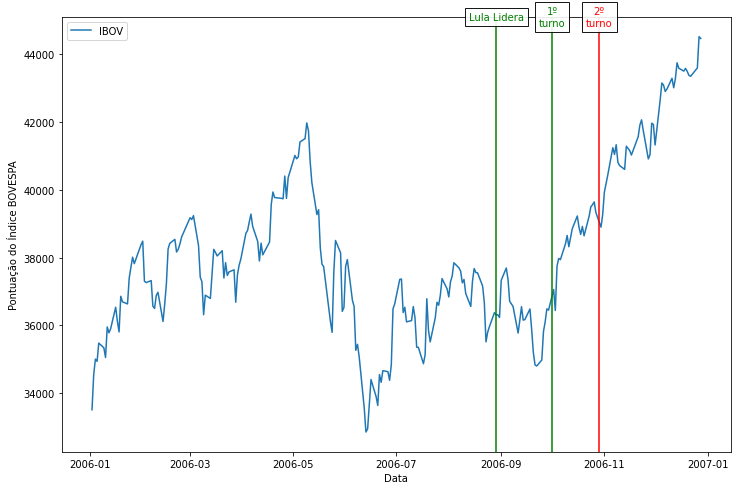

In [18]:
fig, ax = plt.subplots(figsize=(12, 8))
# ibovespa
ax.plot(ibov_2006['Close'], label='IBOV')
mmv = ibov_2006['Close'].rolling(window =10).mean()
ax.set_xlabel('Data')
ax.set_ylabel('Pontuação do Índice BOVESPA')
ax.legend(loc='upper left')
#
for date_point, label, clr in labels:
    plt.axvline(x=date_point, color=clr)
    plt.text(date_point, ax.get_ylim()[1]-4, label,
             horizontalalignment='center',
             verticalalignment='center',
             color=clr,
             bbox=dict(facecolor='white', alpha=0.9))

## Eleições 2010

Datas de votação

- 1º turno - 03/10/2010
- 2º turno - 31/10/2010

Datafolha Pesquisas

- "Serra se isola no Segundo lugar" - 07/06/2002
- "Ciro chega a 18% e empata com Serra no segundo lugar" - 05/07/2002
- "Ciro chega a 28% e se aproxima de Lula; sem Garotinho, ocorre empate técnico entre os dois candidatos" - 30/07/2002
- "Lula se recupera e atinge 37%; Ciro oscila negativamente e tem 27%; Serra divide terceiro lugar com Garotinho" - 16/08/2002
- ["Ibope e Datafolha divulgam última pesquisa presidencial do 1º turno"](https://g1.globo.com/especiais/eleicoes-2010/noticia/2010/10/ibope-e-datafolha-divulgam-ultima-pesquisa-presidencial-do-1-turno.html) - 02/10/2010


[Fonte Wiki](https://pt.wikipedia.org/wiki/Pesquisas_de_opini%C3%A3o_na_elei%C3%A7%C3%A3o_presidencial_brasileira_de_2010)


In [ ]:
start10 = '2010-01-01'
end10 = '2010-12-31'

#### Fatores Primeiro Turno

In [ ]:
labels = [(pd.to_datetime("2010-10-03"), '1º\nturno', 'g'),
          (pd.to_datetime("2010-10-31"), '2º\nturno', 'g')] 

In [ ]:
ibov_2010 = stock_data('^BVSP', start10, end10)

[*********************100%***********************]  1 of 1 completed


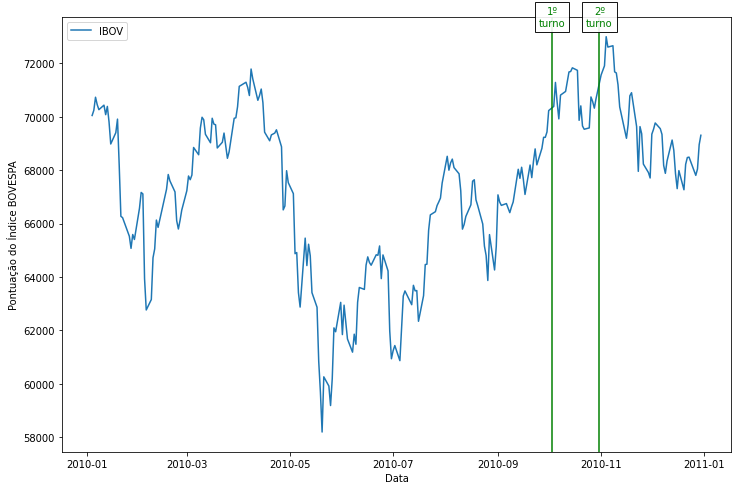

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
# ibovespa
ax.plot(ibov_2010['Close'], label='IBOV')
mmv = ibov_2010['Close'].rolling(window =10).mean()
ax.set_xlabel('Data')
ax.set_ylabel('Pontuação do Índice BOVESPA')
ax.legend(loc='upper left')
#
for date_point, label, clr in labels:
    plt.axvline(x=date_point, color=clr)
    plt.text(date_point, ax.get_ylim()[1]-4, label,
             horizontalalignment='center',
             verticalalignment='center',
             color=clr,
             bbox=dict(facecolor='white', alpha=0.9))

## Eleições 2014

Datas de votação

- 1º turno - 06/10/2014
- 2º turno - 27/10/2014

Dias com fatos relevantes (temas políticos)

- Queda do avião de Eduardo Campos: 13/08/2014

[Fonte Wiki](https://pt.wikipedia.org/wiki/Pesquisas_de_opini%C3%A3o_da_elei%C3%A7%C3%A3o_presidencial_no_Brasil_em_2014)



## Eleições 2018

Datas de votação

- 1º turno - 07/10/2018
- 2º turno - 28/10/2018

Dias com fatos relevantes (temas políticos)

- Lula Indeferido TSE (inelegível): 01/09/2018
- Facada em Bolsonaro: 06/09/2018
- Alta médica da facada: 29/09/2018


[Fonte Wiki](https://pt.wikipedia.org/wiki/Pesquisas_de_opini%C3%A3o_sobre_a_elei%C3%A7%C3%A3o_presidencial_do_Brasil_em_2018)

In [ ]:
!pip install quandl

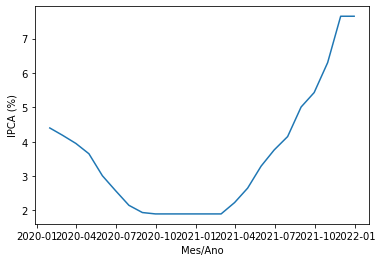

TypeError: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:
# bovespa quandl.get("BCB/7")
ipca = quandl.get('BCB/4392', start_date="2020-01-01")

figure = plt.plot(ipca)
plt.xlabel('Mes/Ano')
plt.ylabel('IPCA (%)')
plt.show()
plt.savefig('ipca.png')
plt.close(figure)

# Referências

- [As pesquisas eleitorais erram tanto assim?](https://www.ibpad.com.br/blog/politica/pesquisas-eleitorais-erram-tanto-assim/)